In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("/content/АВСОФТ_тест_ML_приложение.csv")
df.head(5)

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7


# Посмотрим на распределение таргета, а также на основные характеристики датасета

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


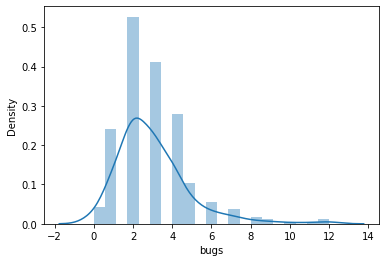

In [132]:
sns.distplot(df.bugs)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repository_name  319 non-null    object
 1   commit_hash      319 non-null    object
 2   commit_date      319 non-null    object
 3   commit_author    319 non-null    object
 4   commit_message   319 non-null    object
 5   bugs             319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [134]:
df.describe()

,bugs
count,319.000000
mean,2.996865
std,1.855636
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [135]:
for col in df.columns:
  uniq_val = df[col].unique()
  if len(uniq_val) <= 13:
    print(f"{col}: {uniq_val}")

repository_name: ['mlm' 'standard' 'agent' 'conductor' 'dockers' 'sensor']
commit_author: ['Victor' 'Peggy' 'Wendy' 'Trudy' 'Mallory' 'Eve' 'Dabe' 'Carol' 'Bob'
 'Alice']
bugs: [ 4  3  7  6  2  5  1 11 10  8  9 12  0]


# Посмотрим на каждый репозиторий отдельно

In [136]:
df[df["repository_name"] == "mlm"]

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
5,mlm,4f5f3743,2020-06-11T09:12:37,Peggy,Добавлено больше логирования и фикс до частичн...,6
6,mlm,24a11c40,2020-06-10T15:34:22,Victor,"Отладка, чтоб оно хотябы запускалось",4
7,mlm,3287c74a,2020-06-10T15:34:04,Victor,Добавил скрипт для запуска контейнера,4
8,mlm,c78d5187,2020-06-10T15:22:21,Victor,label не нужен,2
9,mlm,bcb47e60,2020-06-10T14:54:14,Victor,Установка всех зависимостей теперь в докер файле,5


In [137]:
df[df["repository_name"] == "standard"]

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
41,standard,5291cf7f,2020-05-21T16:06:09,Wendy,fix trap,1
42,standard,b904f026,2020-05-21T16:04:16,Wendy,oups fixed dist,0
43,standard,5dbea449,2020-05-21T15:47:32,Wendy,Добавлены теги к service,3
44,standard,5ec1a987,2020-05-18T06:04:34,Victor,Статус файла на проверке pending или complete,6
45,standard,6ba6c317,2020-05-15T23:26:11,Wendy,Merge branch 'master' of,3
46,standard,c096e5bf,2020-05-15T23:22:59,Wendy,Добавлена возможность создания тунелей,3
47,standard,edd2e76d,2020-05-14T15:06:39,Wendy,Изменены поля создания атаки,3
48,standard,e4b384b3,2020-05-14T14:49:28,Victor,Обработка сессий от коври,3
49,standard,97bfc357,2020-05-14T13:14:58,Wendy,delete trash,2
50,standard,3795475a,2020-05-14T13:08:33,Wendy,Merge branch 'master' of,3


In [138]:
df[df["repository_name"] == "agent"]

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
70,agent,8a79f45a,2020-06-09T12:07:38,Victor,self deploy,1
71,agent,a02a28ef,2020-06-08T07:54:27,Victor,Делать бэкап при первом запуске,3
72,agent,ba2e2e4d,2020-06-05T16:36:09,Victor,added deploy scripts,2
73,agent,bd7d2bec,2020-06-05T11:53:30,Victor,Смена адреса хоста обновлений,3
74,agent,d0dc6d3c,2020-05-27T12:13:53,Victor,Added update logs,2
75,agent,9e02a679,2020-05-22T16:08:34,Victor,Обращение к главному серверу,3
76,agent,bda75ca8,2020-05-22T15:35:28,Victor,Логирование всех выполненых на хосте команд,4
77,agent,5c15329d,2020-05-22T14:57:16,Victor,Поправки после запуска на тестовом сервере,4
78,agent,7243a436,2020-05-22T11:53:13,Victor,Подключение с приватным ключем,3
79,agent,9adb67cf,2020-05-20T15:40:58,Victor,Импорт одной функции из storage.py вместо *,5


In [139]:
df[df["repository_name"] == "conductor"]

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
84,conductor,ddf7c557,2020-06-12T09:45:18,Wendy,Улучшен алгоритм отправки файла,2
85,conductor,ae539a47,2020-06-11T16:00:55,Wendy,add check before upload,2
86,conductor,341d6116,2020-06-11T10:47:25,Wendy,fix turnoff filebeat,2
87,conductor,dea39c26,2020-06-10T16:30:46,Wendy,fix IMAGES when wrong yaml,3
88,conductor,b324feb4,2020-06-10T15:47:06,Wendy,changed images,1
...,...,...,...,...,...,...
193,conductor,f94bf962,2020-03-13T20:00:31,Dabe,regex tag toggling,3
194,conductor,26b6cf43,2020-03-13T17:40:48,Dabe,Added requirements.txt,2
195,conductor,52a72592,2020-03-13T17:39:22,Dabe,added .gitignore,2
196,conductor,1fe9eeaf,2020-03-13T17:38:31,Dabe,Multiple commenting doesnt add multiple hashtags,5


In [140]:
df[df["repository_name"] == "dockers"]

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
198,dockers,34a51e72,2020-06-10T11:35:45,Wendy,change compose file for dionaea,3
199,dockers,7707c5a4,2020-06-10T11:32:26,Wendy,fix dionaea bitstrams and error.log,3
200,dockers,ac8a823a,2020-06-03T12:19:30,Wendy,Merge branch 'changes-to-merge' into 'master',3
201,dockers,2ac5f8a8,2020-06-02T13:35:06,Carol,"ciscoasa_v2: add logging, file.log -> file.jso...",0
202,dockers,276f5e84,2020-06-02T11:38:37,Wendy,Merge branch 'changes-to-merge' into 'master',3
203,dockers,363ec636,2020-05-29T12:04:24,Carol,fatt_v2: pyshark memory leak problem solved,2
204,dockers,61235548,2020-05-25T16:47:19,Wendy,Merge branch 'changes-to-merge' into 'master',3
205,dockers,e28c92d3,2020-05-24T16:27:18,Carol,kako_v2: -you can change active simulations wi...,4
206,dockers,68c4f04b,2020-05-21T09:17:33,Wendy,Merge branch 'changes-to-merge' into 'master',3
207,dockers,6e32133b,2020-05-20T21:25:51,Carol,"KAKO: kako.json,kako.log; NTP: ntp_logs.json; ...",0


In [141]:
df[df["repository_name"] == "sensor"]

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
217,sensor,d275bcda,2020-06-10T10:17:03,Wendy,No more log rotate,2
218,sensor,ac6c6b1b,2020-06-04T20:44:51,Wendy,Update rules.yaml,1
219,sensor,65ab088c,2020-06-04T20:33:07,Wendy,Добавлен энтрипоинт,1
220,sensor,09a3e460,2020-06-04T18:28:36,Wendy,add rules folder,1
221,sensor,6ff623e0,2020-06-04T16:17:13,Wendy,fix rules.yaml,1
...,...,...,...,...,...,...
314,sensor,5b1ecbcd,2020-03-23T12:54:35,Dabe,setting hostname,1
315,sensor,a3f5b753,2020-03-23T12:30:52,Dabe,heralding default dockerfile,2
316,sensor,e8155942,2020-03-23T11:27:40,Dabe,unnesserity /data path permissions setting,3
317,sensor,e748af51,2020-03-23T11:20:50,Dabe,added trapconductor,1


# Удаляем хеш, ибо он ничего не значит, кроме как возможность посмотреть на состояние проекта в момент коммита.

In [142]:
del df["commit_hash"]

# Временные данные необходимо упорядочить в порядке возрастания

In [143]:
df = df.iloc[::-1].copy()

In [144]:
df

,repository_name,commit_date,commit_author,commit_message,bugs
318,sensor,2020-03-23T11:07:07,Dabe,sensor,1
317,sensor,2020-03-23T11:20:50,Dabe,added trapconductor,1
316,sensor,2020-03-23T11:27:40,Dabe,unnesserity /data path permissions setting,3
315,sensor,2020-03-23T12:30:52,Dabe,heralding default dockerfile,2
314,sensor,2020-03-23T12:54:35,Dabe,setting hostname,1
...,...,...,...,...,...
4,mlm,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
3,mlm,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
2,mlm,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
1,mlm,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3


In [145]:
df.reset_index(drop=True, inplace=True)
df

,repository_name,commit_date,commit_author,commit_message,bugs
0,sensor,2020-03-23T11:07:07,Dabe,sensor,1
1,sensor,2020-03-23T11:20:50,Dabe,added trapconductor,1
2,sensor,2020-03-23T11:27:40,Dabe,unnesserity /data path permissions setting,3
3,sensor,2020-03-23T12:30:52,Dabe,heralding default dockerfile,2
4,sensor,2020-03-23T12:54:35,Dabe,setting hostname,1
...,...,...,...,...,...
314,mlm,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
315,mlm,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
316,mlm,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
317,mlm,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3


# В целом, можно было бы использовать какие-то статистические модели (ARIMA ARFIMA), ибо у нас есть временной ряд, но мне кажется, что они будут плохо работать, ибо это все-таки не курс какой-либо валюты. Поэтому убираем время.
# Теперь нужно обработать категориальные признаки. Так как мы будем использовать линейные модели, то LabelEncoder не подходит, поэтому будем использовать OneHotEncoder.

In [146]:
del df["commit_date"]

In [147]:
categoricalColumns = ["repository_name", "commit_author"]

In [148]:
for col in categoricalColumns:
  df = pd.concat([df,pd.get_dummies(df[col], prefix= col)],axis=1)
  df.drop([col],axis=1, inplace=True)

In [149]:
df

,commit_message,bugs,repository_name_agent,repository_name_conductor,repository_name_dockers,repository_name_mlm,repository_name_sensor,repository_name_standard,commit_author_Alice,commit_author_Bob,commit_author_Carol,commit_author_Dabe,commit_author_Eve,commit_author_Mallory,commit_author_Peggy,commit_author_Trudy,commit_author_Victor,commit_author_Wendy
0,sensor,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,added trapconductor,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,unnesserity /data path permissions setting,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,heralding default dockerfile,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,setting hostname,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,не надо конвертировать массив до операции по с...,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
315,Сортировка весов по убыванию,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
316,Скрипт для создния пакетов обновления,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
317,Поставил lime вместо eli5,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Теперь необходимо предобработать текстовые данные: нижний регистр, лемматизация, удаление стоп-слов. Это делается, чтобы успешно применить TfidfVectorizer для преобразования текста в вектор, который будет использоваться в качестве фичи.

In [150]:
!pip install spacy-udpipe
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import spacy_udpipe
import nltk
from langdetect import detect
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
spacy_udpipe.download("en") 
spacy_udpipe.download("ru")

Already downloaded a model for the 'en' language
Already downloaded a model for the 'ru' language


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [152]:
def preprocess_text(text):
  eng_model = spacy_udpipe.load("en")
  ru_model = spacy_udpipe.load("ru")
  text = text.lower()
  if detect(text) == "en":
    text = eng_model(text)
  else:
    text = ru_model(text)

  lem_text = ""
  for token in text:
    if token.dep_ != "punct":
      lem_text += " " + token.lemma_
  
  text_tokens = word_tokenize(str(text)) 
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()] 
  filtered_sentence = (" ").join(tokens_without_sw) 
  return filtered_sentence 

df['preprocessed'] = df['commit_message'].apply(preprocess_text)

In [153]:
df.to_csv('preproc.csv')

In [154]:
del df['commit_message']
df

,bugs,repository_name_agent,repository_name_conductor,repository_name_dockers,repository_name_mlm,repository_name_sensor,repository_name_standard,commit_author_Alice,commit_author_Bob,commit_author_Carol,commit_author_Dabe,commit_author_Eve,commit_author_Mallory,commit_author_Peggy,commit_author_Trudy,commit_author_Victor,commit_author_Wendy,preprocessed
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,sensor
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,added trapconductor
2,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,unnesserity /data path permissions setting
3,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,heralding default dockerfile
4,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,setting hostname
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,конвертировать массив операции смене знака
315,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,сортировка весов убыванию
316,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,скрипт создния пакетов обновления
317,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,поставил lime вместо eli5


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,4))
vectorized_text = vectorizer.fit_transform(df["preprocessed"])
BUF = pd.DataFrame(data=vectorized_text.todense(), columns=vectorizer.get_feature_names())
del BUF["bugs"]
df = pd.concat([df, BUF], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [156]:
del df["preprocessed"]
target = df["bugs"].copy()
features = df.copy()
del features["bugs"]

In [157]:
df["bugs"]

0      1
1      1
2      3
3      2
4      1
      ..
314    7
315    3
316    4
317    3
318    4
Name: bugs, Length: 319, dtype: int64

In [158]:
target.value_counts()

2     96
3     75
4     51
1     44
5     19
6     10
0      8
7      7
8      3
9      2
12     2
10     1
11     1
Name: bugs, dtype: int64

### Теперь разделим наш датасет на обучающую и тестовую выборки.
### Для тестовой выборки возьмем 15% от всех данных. 

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

### Далее нужно выбрать модель, с помощью которой мы будем предсказывать наш target. 
### В качестве первой модели будем использовать линейную легрессию. Ее мы выбрали по следующим причинам:
### 1) легкая (очень быстро обучается и предсказывает) модель;
### 2) мы заметили, что наши высококоррелированные признаки ~линейно зависят от target'a;
### 3) хорошо интерпретируется.

### Чтобы избежать переобучения, регуляризуем модель

### Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это alpha -  коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Мы перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины.

Best alpha = 0.0100


Text(0, 0.5, 'CV score')

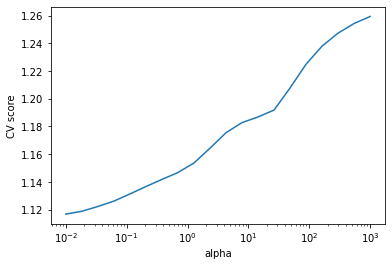

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_absolute_error", cv=5)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

### В качестве метрик выберем R^2, MAE и MSE метрики для оценки качества задачи регрессии


In [172]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

def score(y_train, y_train_pred, y_test, y_pred):
  print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
  print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
  print("Train MAE = %.4f" % MAE(y_train, y_train_pred))
  print("Test MAE = %.4f" % MAE(y_test, y_pred))
  print("Train MSE = %.4f" % MSE(y_train, y_train_pred))
  print("Test MSE = %.4f" % MSE(y_test, y_pred))

In [173]:
from sklearn.metrics import r2_score

model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

score(y_train, y_train_pred, y_test, y_pred)

Train R^2 = 0.9999
Test R^2 = 0.3244
Train MAE = 0.0133
Test MAE = 1.2520
Train MSE = 0.0004
Test MSE = 3.0684


In [175]:
import xgboost

model = xgboost.XGBRegressor(booster="gblinear", reg_lambda=best_alpha, objective="reg:squarederror")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

score(y_train, y_train_pred, y_test, y_pred)

Train R^2 = 0.6106
Test R^2 = 0.3008
Train MAE = 0.8126
Test MAE = 1.3306
Train MSE = 1.2396
Test MSE = 3.1754


### Как мы можем заметить, градиентный бустинг дал результат хуже, чем обычная регрессия